In [10]:
import pandas as pd 
import numpy as np

data_fream = pd.read_csv(r'C:\Users\Rohan\Desktop\Group_Project_1\Data\electric_vehicles_spec_2025.csv.csv')

print(data_fream.head())

    brand                model  top_speed_kmh  battery_capacity_kWh  \
0  Abarth     500e Convertible            155                  37.8   
1  Abarth       500e Hatchback            155                  37.8   
2  Abarth  600e Scorpionissima            200                  50.8   
3  Abarth         600e Turismo            200                  50.8   
4  Aiways                   U5            150                  60.0   

  battery_type  number_of_cells  torque_nm  efficiency_wh_per_km  range_km  \
0  Lithium-ion            192.0      235.0                   156       225   
1  Lithium-ion            192.0      235.0                   149       225   
2  Lithium-ion            102.0      345.0                   158       280   
3  Lithium-ion            102.0      345.0                   158       280   
4  Lithium-ion              NaN      310.0                   156       315   

   acceleration_0_100_s  ...  towing_capacity_kg cargo_volume_l  seats  \
0                   7.0  ...  

In [20]:
missing_Value = data_fream.isnull().sum()
print(missing_Value)
missing_col = data_fream.columns[data_fream.isnull().sum() > 0]
print()

print(missing_col)

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

Index(['model', 'number_of_cells', 'torque_nm', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l'],
      dtype='object')


In [18]:
duplicate_value = data_fream.duplicated()
print(duplicate_value)

0      False
1      False
2      False
3      False
4      False
       ...  
473    False
474    False
475    False
476    False
477    False
Length: 478, dtype: bool


In [21]:
# fill the missing value 
numeric_col = data_fream.select_dtypes(include=['int64', 'float64']).columns
data_fream[numeric_col] = data_fream[numeric_col].fillna(data_fream[numeric_col].median(numeric_only=True))
print("Missing values after filling:")
print(data_fream.isnull().sum()[data_fream.isnull().sum() > 0])

Missing values after filling:
model               1
fast_charge_port    1
cargo_volume_l      1
dtype: int64


In [23]:
categorical_cols = data_fream.select_dtypes(include='object').columns
for col in categorical_cols:
    if data_fream[col].isnull().sum() > 0:
        data_fream[col].fillna(data_fream[col].mode()[0], inplace=True)

# 3. Optional: Confirm that all missing values are handled
print("Missing values after filling:")
print(data_fream.isnull().sum()[data_fream.isnull().sum() > 0])

Missing values after filling:
Series([], dtype: int64)


In [24]:
data_fream.to_excel("Data\\Electric_Data_Updated.xlsx",index=False)

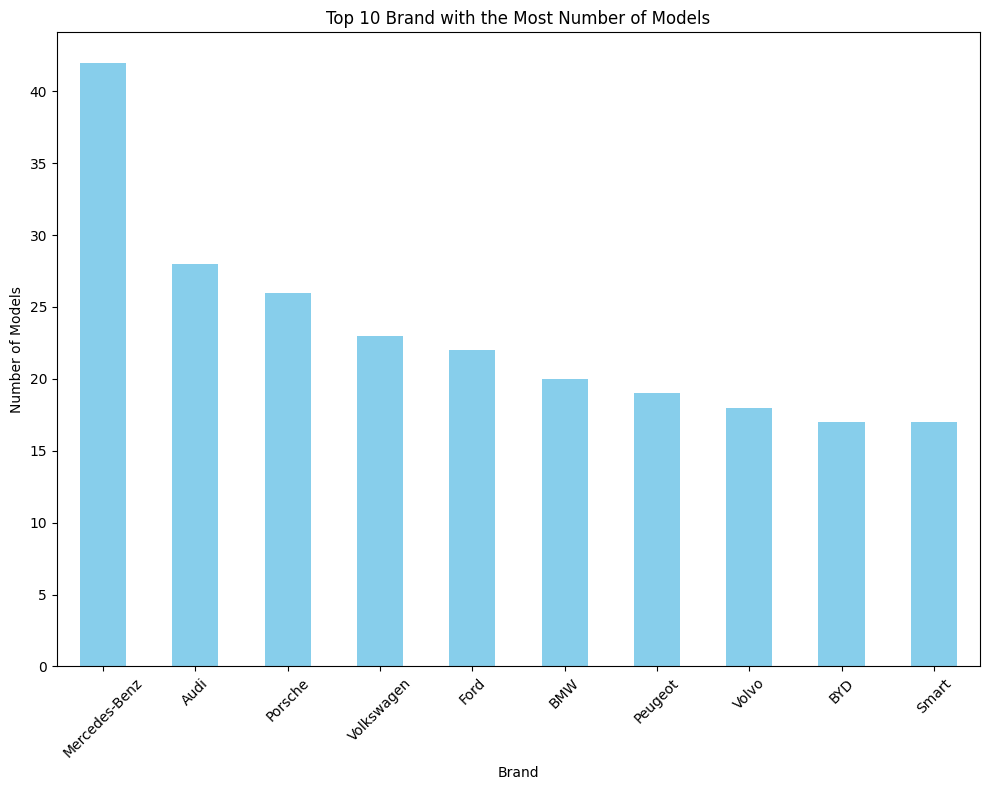

In [28]:


# Phase -3 

import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

df = pd.read_excel("Data\\Electric_Data_Updated.xlsx") 
# print(df.head())

brand_count = df['brand'].value_counts().head(10)

plt.figure(figsize=(10,8))
brand_count.plot(kind='bar',color='skyblue')
plt.title("Top 10 Brand with the Most Number of Models")
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

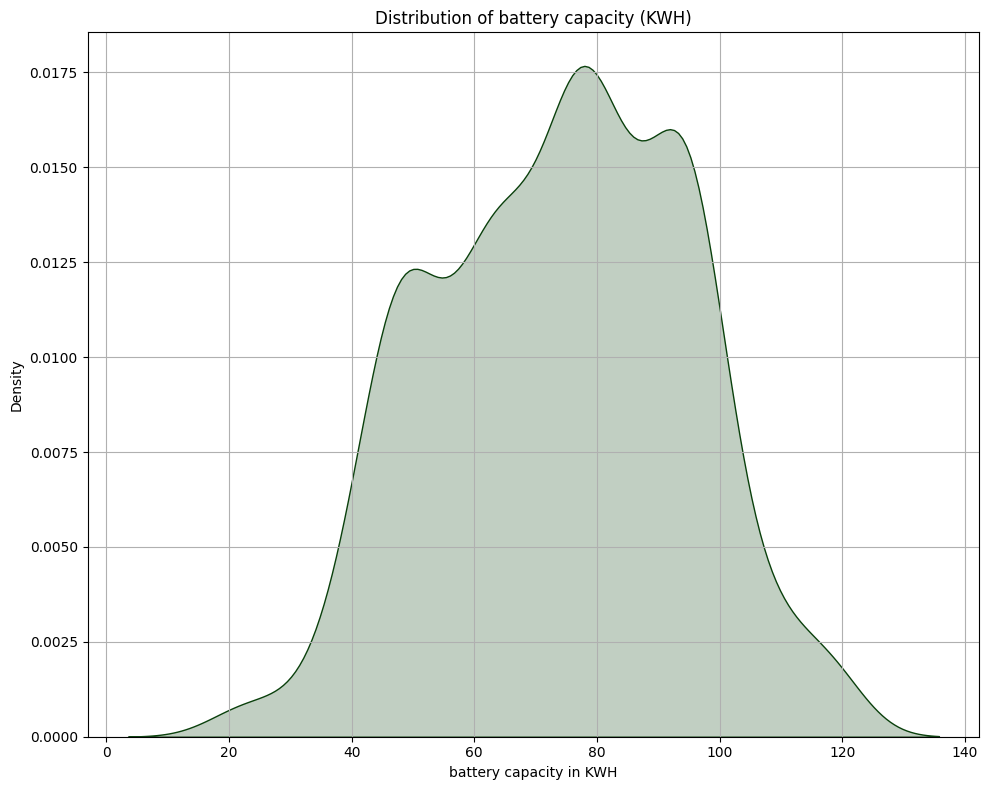

In [32]:
# Distribution of battery capacity	Histogram / KDE plot

plt.figure(figsize=(10,8))
sns.kdeplot(df['battery_capacity_kWh'],color='#0A400C',fill=True)
plt.title("Distribution of battery capacity (KWH)")
plt.xlabel('battery capacity in KWH')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

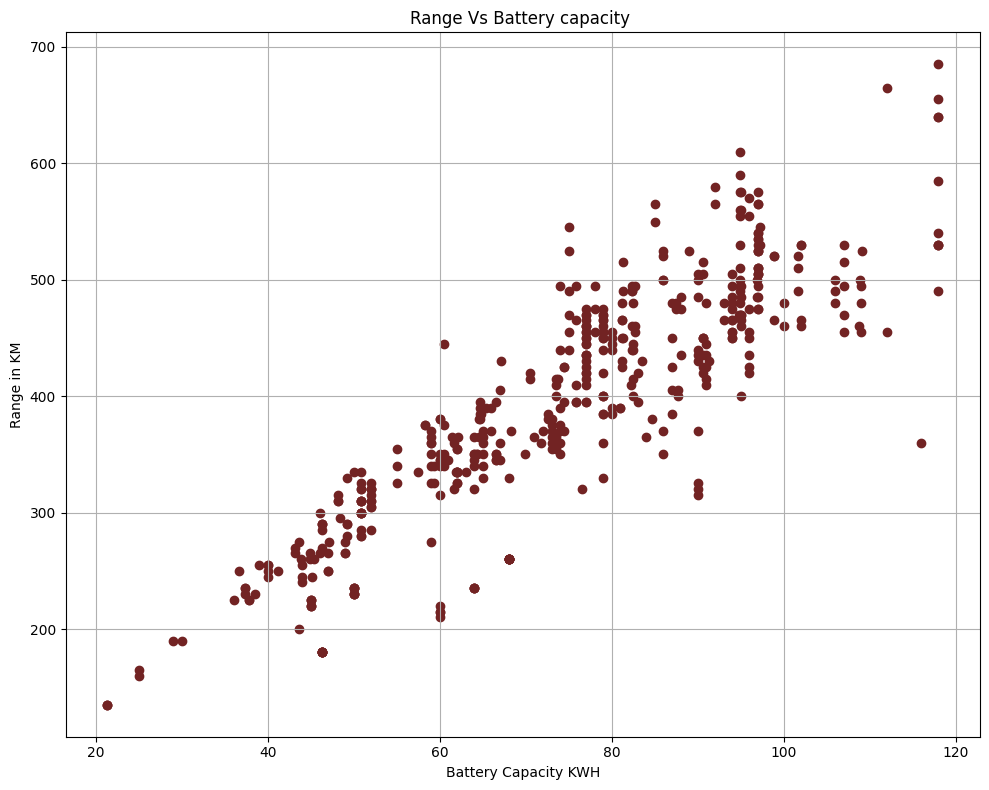

In [34]:
#Range vs Battery size	Scatter plot

plt.figure(figsize=(10,8))
plt.scatter(df['battery_capacity_kWh'],df['range_km'],color='#722323')
plt.title("Range Vs Battery capacity ")
plt.xlabel("Battery Capacity KWH")
plt.ylabel("Range in KM")
plt.tight_layout()
plt.grid(True)
plt.show()

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_excel("Data\\Electric_Data_Updated.xlsx") 

print(df.head())

    brand                model  ...  car_body_type                                         source_url
0  Abarth     500e Convertible  ...      Hatchback  https://ev-database.org/car/1904/Abarth-500e-C...
1  Abarth       500e Hatchback  ...      Hatchback  https://ev-database.org/car/1903/Abarth-500e-H...
2  Abarth  600e Scorpionissima  ...            SUV  https://ev-database.org/car/3057/Abarth-600e-S...
3  Abarth         600e Turismo  ...            SUV  https://ev-database.org/car/3056/Abarth-600e-T...
4  Aiways                   U5  ...            SUV         https://ev-database.org/car/1678/Aiways-U5

[5 rows x 22 columns]


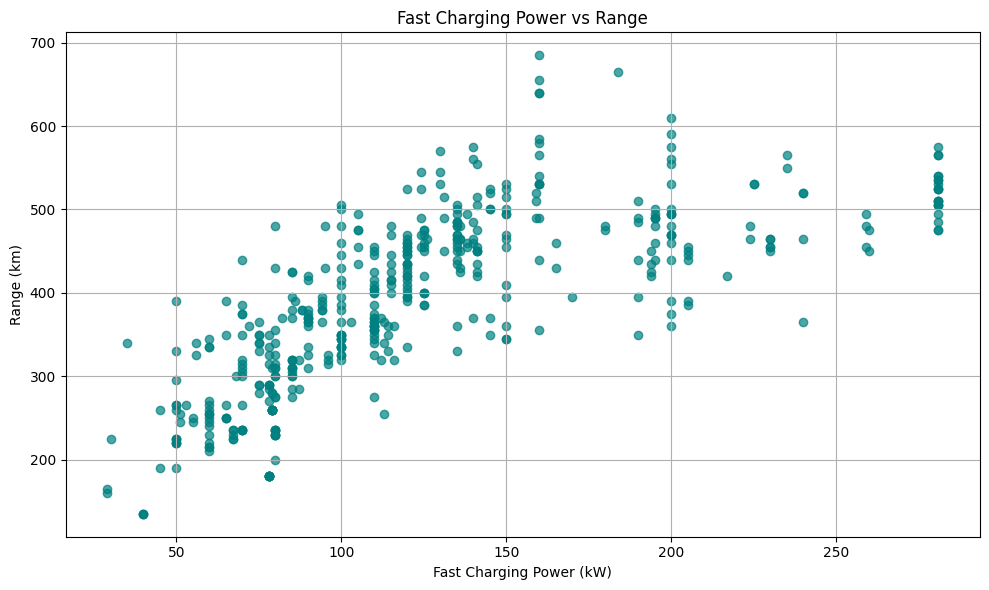

In [2]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['fast_charging_power_kw_dc'], df['range_km'], color='teal', alpha=0.7)
plt.title('Fast Charging Power vs Range')
plt.xlabel('Fast Charging Power (kW)')
plt.ylabel('Range (km)')
plt.grid(True)
plt.tight_layout()
plt.show()

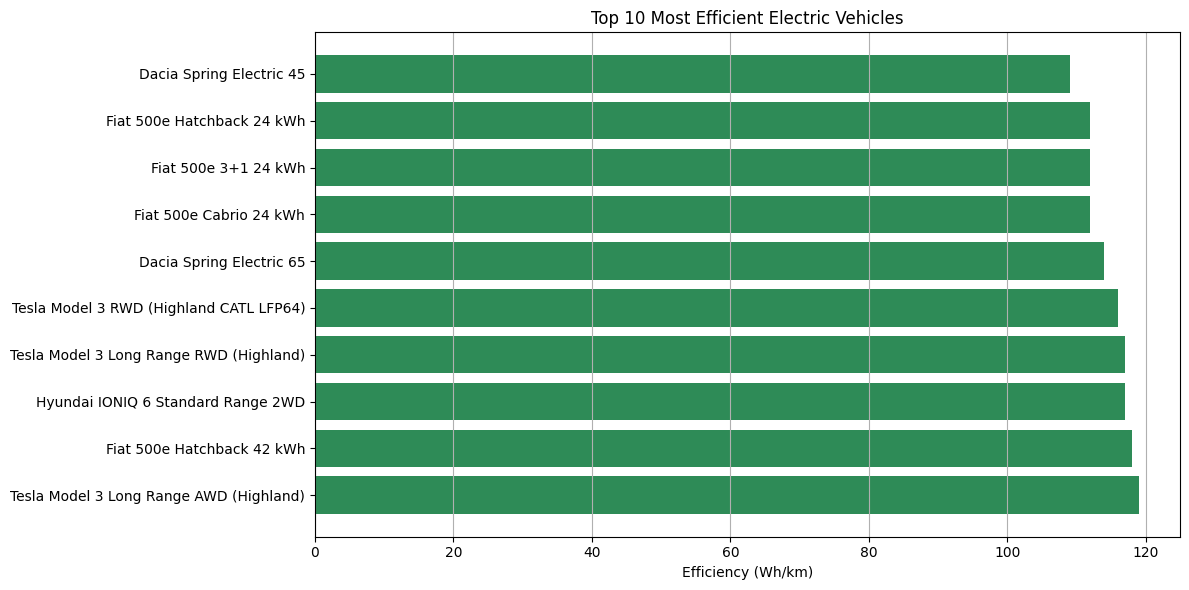

In [3]:
# Sort by efficiency (lowest first)
efficient_models = df[['brand', 'model', 'efficiency_wh_per_km']].sort_values(by='efficiency_wh_per_km').head(10)

# Combine brand + model for labels
efficient_models['full_name'] = efficient_models['brand'] + ' ' + efficient_models['model']

# Plot
plt.figure(figsize=(12, 6))
plt.barh(efficient_models['full_name'], efficient_models['efficiency_wh_per_km'], color='seagreen')
plt.xlabel('Efficiency (Wh/km)')
plt.title('Top 10 Most Efficient Electric Vehicles')
plt.gca().invert_yaxis()  # Most efficient on top
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

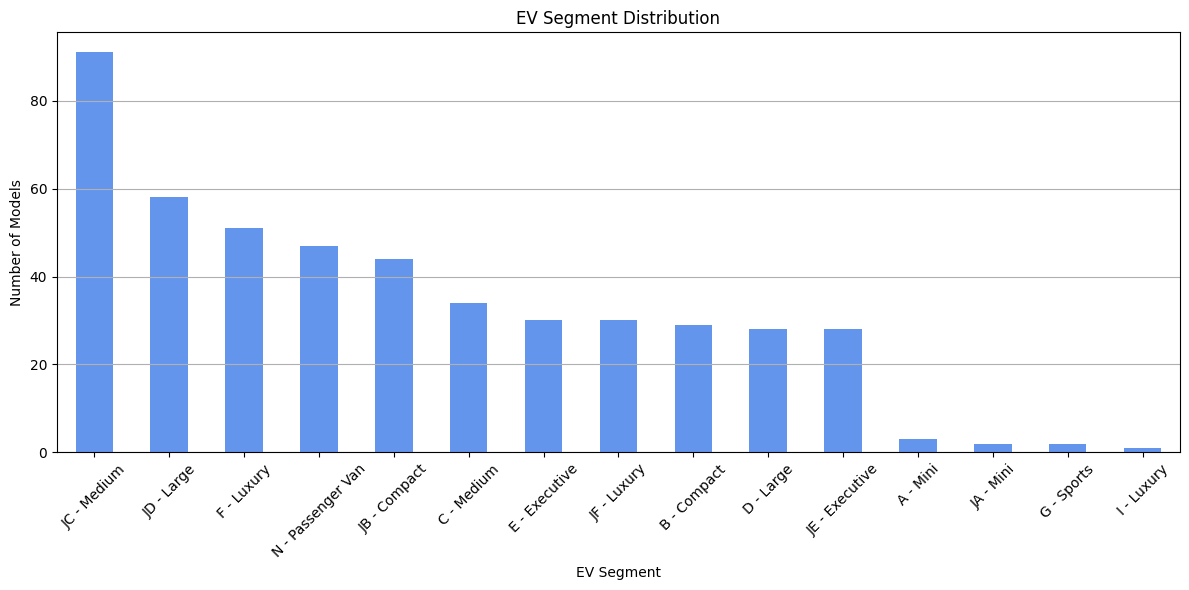

In [4]:

# Count the number of EVs in each segment
segment_counts = df['segment'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
segment_counts.plot(kind='bar', color='cornflowerblue')
plt.title('EV Segment Distribution')
plt.xlabel('EV Segment')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

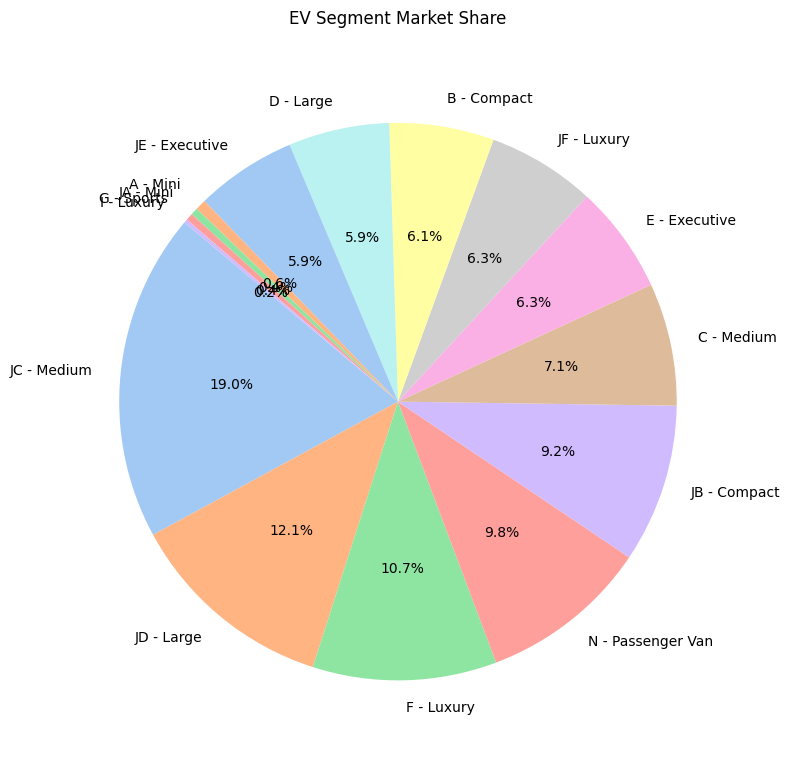

In [11]:
segment_counts = df['segment'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('EV Segment Market Share')
plt.axis('equal')  # Keep circle shape
plt.tight_layout()
plt.show()

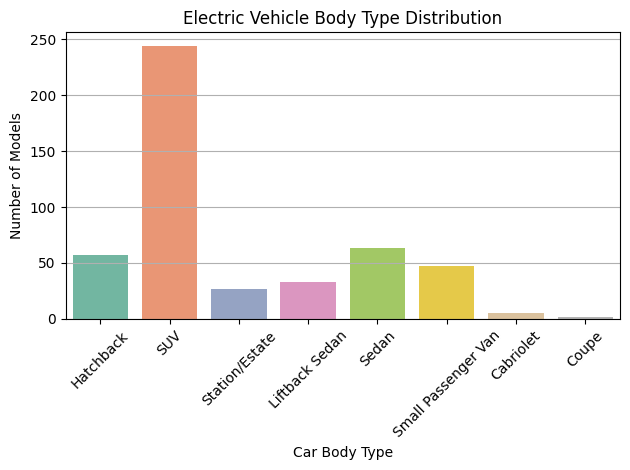

In [13]:
# Use `hue=x` and set legend=False to remove the warning
sns.countplot(data=df, x='car_body_type', hue='car_body_type', palette='Set2', legend=False)

plt.title('Electric Vehicle Body Type Distribution')
plt.xlabel('Car Body Type')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [26]:
df['range_per_kWh'] = df['range_km'] / df['battery_capacity_kWh']

def classify_range(range_km):
    if range_km < 300:
        return 'Short'
    elif 300 <= range_km <= 500:
        return 'Mid'
    else:
        return 'Long'

df['range_category'] = df['range_km'].apply(classify_range)


top_efficiency = comparison_df.sort_values(by='efficiency_wh_per_km').head(10)


print("Top 10 Most Efficient EVs (Lowest Wh/km):")
# print(df.head(10))
print(top_efficiency)
df.to_excel("Data//with Feature.xlsx")
print("File is Created ")

Top 10 Most Efficient EVs (Lowest Wh/km):
       brand                              model  range_km  ...  range_category  efficiency_wh_per_km cargo_volume_per_seat
98     Dacia                 Spring Electric 45       165  ...           Short                   109                 77.00
107     Fiat              500e Hatchback 24 kWh       135  ...           Short                   112                 46.25
103     Fiat                    500e 3+1 24 kWh       135  ...           Short                   112                 46.25
105     Fiat                 500e Cabrio 24 kWh       135  ...           Short                   112                 46.25
99     Dacia                 Spring Electric 65       160  ...           Short                   114                 77.00
400    Tesla  Model 3 RWD (Highland CATL LFP64)       445  ...             Mid                   116                118.80
398    Tesla  Model 3 Long Range RWD (Highland)       545  ...            Long                   

In [27]:
print(df['range_km'])

0      225
1      225
2      280
3      280
4      315
      ... 
473    365
474    265
475    360
476    350
477    250
Name: range_km, Length: 478, dtype: int64 ['range_category '] ['range_per_kWh']


In [2]:
import pandas as pd
import joblib
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_excel("Data\\Electric_Data_Updated.xlsx") 

features = ['battery_capacity_kWh', 'efficiency_wh_per_km', 'torque_nm']
target = 'range_km'

df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# --- 8. Results ---
print("📈 Model Performance:")
print(f"MAE : {mae:.2f} km")
print(f"RMSE: {rmse:.2f} km")
print(f"R²  : {r2:.2f}")

# --- 9. Sample Predictions ---
sample = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10]})
print("\nSample Predictions:")
print(sample)

ev_input = pd.DataFrame([[77, 169, 545]], columns=['battery_capacity_kWh', 'efficiency_wh_per_km', 'torque_nm'])

# Predict using the same structure
predicted_range = model.predict(ev_input)[0]

print("Predicted Range (km):", round(predicted_range, 2))


# Assuming your trained model is named `model`
joblib.dump(model, 'ev_range_predictor.pkl')

📈 Model Performance:
MAE : 28.36 km
RMSE: 37.14 km
R²  : 0.87

Sample Predictions:
   Actual   Predicted
0     480  501.666639
1     495  501.612943
2     235  107.738062
3     415  426.973120
4     445  431.939151
5     320  277.570654
6     400  384.298042
7     365  355.235700
8     290  294.735208
9     305  298.863711
Predicted Range (km): 401.6


['ev_range_predictor.pkl']